In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)

**Carpetas de entrada**

In [2]:
Ruta_data_procesada = '../../Data/data_procesada'
Ruta_data_procesada_full = r'C:\Users\jalvarez\OneDrive\Estudios\Programacion\Soy Henry Datos e IA\Dataft21\PG\Data\data_procesada'

## Simplificar "Dataset_Business_extendido"

Se creará otro dataframe con solo negocios de restaurantes y se quitará columnas inncesarias

In [3]:
Dataset_Business_extendido = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Business_extendido.parquet"))

In [4]:
Dataset_Business_extendido.head(2)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours_Dataset_Business,first_category,Descripcion_BusinessAtributos,Descripcion_BusinessCategorias,date,compliment_count
0,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors,ByAppointmentOnly,Doctors,None,NaN
1,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors,ByAppointmentOnly,Traditional Chinese Medicine,None,NaN


In [5]:
Dataset_Business_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61365592 entries, 0 to 61365591
Data columns (total 16 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id_business                     int64  
 1   name                            object 
 2   city                            object 
 3   state                           object 
 4   postal_code                     int64  
 5   latitude                        float64
 6   longitude                       float64
 7   stars                           float64
 8   review_count                    int64  
 9   categories                      object 
 10  hours_Dataset_Business          object 
 11  first_category                  object 
 12  Descripcion_BusinessAtributos   object 
 13  Descripcion_BusinessCategorias  object 
 14  date                            object 
 15  compliment_count                float64
dtypes: float64(4), int64(3), object(9)
memory usage: 7.3+ GB


In [6]:
# Agrupamos los establecimientos con el mismo nombre (son los mismos establecimientos) y nos quedamos con la primera categoría comomo 'first_category'
Dataset_Business_extendido = Dataset_Business_extendido.drop_duplicates(subset=['name'], keep='first')
Dataset_Business_extendido.head(3)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours_Dataset_Business,first_category,Descripcion_BusinessAtributos,Descripcion_BusinessCategorias,date,compliment_count
0,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutritionists","{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors,ByAppointmentOnly,Doctors,None,NaN
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants,None,Synagogues,2017-09-20 17:00:27,0.0
146,4,Perkiomen Valley Brewery,Green Lane,Pennsylvania,18054,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0', 'Thursday': '16:0-22:0', 'Tuesday': None, 'Wednesday': '14:0-22:0'}",Brewpubs,RestaurantsPriceRange2,Department Stores,2020-08-14 16:08:41,0.0


In [7]:
# Borramos algunas columnas por ya no ser necesarias
Dataset_Business_extendido.drop(columns=['categories', 'Descripcion_BusinessAtributos', 'Descripcion_BusinessCategorias', 'date', 'compliment_count'], inplace=True)
Dataset_Business_extendido.head(3)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category
0,0,"Abby Rappoport, LAC, CMQ",Santa Barbara,California,93101,34.426679,-119.711197,5.0,7,"{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Doctors
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants
146,4,Perkiomen Valley Brewery,Green Lane,Pennsylvania,18054,40.338183,-75.471659,4.5,13,"{'Friday': '12:0-22:0', 'Monday': None, 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0', 'Thursday': '16:0-22:0', 'Tuesday': None, 'Wednesday': '14:0-22:0'}",Brewpubs


In [8]:
# Filtros para solo seleccionar negocios relacionados a restaurantes

categories_exclude = ['shopping', 'beauty', 'salon','Sports Bars','Pets', 'Pet Adoption', 'Nightlife','Gastropubs','Automotive','Custom Cakes', 'Desserts', 'Cupcakes', 'Ice Cream & Frozen Yogurt',
                      'Organic Stores', 'Health Markets', 'Grocery','Cupcakes', 'Street Vendors', 'Food Trucks','Acai Bowls','Home Services', 'Painters', 'Contractors', 'Pressure Washers', 'Shopping',
                      'Fences & Gates', 'Flooring', 'Home & Garden', 'Door Sales/Installation', 'Kitchen & Bath', 'Home Inspectors','Health & Medical', 'Pharmacy', 'Convenience Stores', 'Drugstores',
                      'Flowers & Gifts', 'Chocolatiers & Shops', 'Florists', 'Gift Shops', 'American (New)', 'Music Venues', 'Breakfast & Brunch', 'Arts & Entertainment', 'Bars', 'American (Traditional)',
                      'Dive Bars', 'Pool Halls','Farmers Market','Building Supplies', 'Masonry/Concrete', 'Countertop Installation','Active Life', 'Advertising', 'Afghan', 'African', 'Airport Terminals',
                      'Airports', 'American (New)', 'American (Traditional)', 'Amusement Parks', 'Water Delivery', 'Water Stores', 'Web Design', 'Wedding Planning', 'Wholesalers', 'Wine & Spirits',
                      'Wine Tasting Classes', 'Wine Tours', 'Wraps', 'Yelp Events', 'Walking Tours']
categories_include = ['Restaurants', 'restaurant', 'cafe', 'food', 'dining', 'eatery', 'bistro', 'bakery', 'grill', 'kitchen', 'pizzeria', 'steakhouse', 'sushi', 'Sushi Bars', 'tavern', 'diner',
                      'Pizza', 'Seafood', 'Food Trucks']

include_pattern = re.compile('|'.join(categories_include), flags=re.IGNORECASE)
exclude_pattern = re.compile('|'.join(categories_exclude), flags=re.IGNORECASE)

mask = Dataset_Business_extendido['first_category'].str.contains(include_pattern)
mask2 = Dataset_Business_extendido['first_category'].str.contains(exclude_pattern)

C:\Users\jalvarez\AppData\Local\Temp\ipykernel_8416\467335826.py:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask2 = Dataset_Business_extendido['first_category'].str.contains(exclude_pattern)


In [10]:
Business_simplificado = Dataset_Business_extendido[mask & ~mask2]
Business_simplificado.head(3)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants
1513,14,Zio's Italian Market,Largo,Florida,33771,27.916116,-82.760461,4.5,100,"{'Friday': '10:0-20:0', 'Monday': '10:0-18:0', 'Saturday': '10:0-20:0', 'Sunday': None, 'Thursday': '10:0-20:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0'}",Food
17041,23,Romano's Macaroni Grill,Reno,Nevada,89502,39.476117,-119.789339,2.5,339,"{'Friday': '11:0-21:0', 'Monday': '11:0-22:0', 'Saturday': '12:0-21:0', 'Sunday': '11:0-21:0', 'Thursday': '11:0-20:0', 'Tuesday': '11:0-22:0', 'Wednesday': '10:0-22:0'}",Restaurants


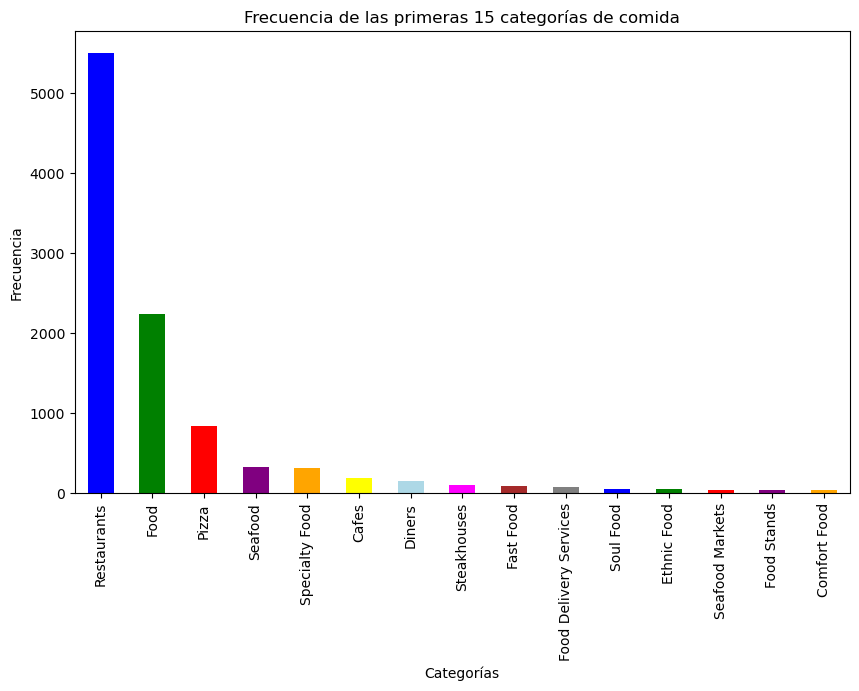

In [14]:
# Gráficos de categorias más frecuentes
category_counts = Business_simplificado['first_category'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
category_counts.plot(kind='bar', color=colors)
plt.title('Frecuencia de las primeras 15 categorías de comida')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
# Exportamos a PARQUET
Business_simplificado.to_parquet(os.path.join(Ruta_data_procesada, "Dataset_Business_simplificado.parquet"))

## Simplificar "Dataset_Review_extendido"

Se creará otro dataframe con solo los reviews de restaurantes (y similares de negocios de comida) y se quitará columnas inncesarias

In [23]:
Dataset_Review_extendido = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Review_extendido.parquet"))

In [24]:
Dataset_Review_extendido.head(1)

,user_id,stars_Dataset_Review,useful,funny,cool,text,id_review,id_user,id_business,anho,mes,dia,hora,name,address,city,state,postal_code,latitude,longitude,stars_Dataset_Business,review_count,is_open,attributes,categories,hours,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,0,0,0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,Pennsylvania,19454,40.210196,-75.223639,3.0,169,1,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': ''none'', 'Ambience': '{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}', 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': 'False', 'BusinessAcceptsBitcoin': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}', 'ByAppointmentOnly': None, 'Caters': 'False', 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': 'False', 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}', 'HairSpecializesIn': None, 'HappyHour': 'False', 'HasTV': 'False', 'Music': None, 'NoiseLevel': 'u'average'', 'Open24Hours': None, 'OutdoorSeating': 'True', 'Restaurants...","Restaurants, Breakfast & Brunch, Food, Juice Bars & Smoothies, American (New), Coffee & Tea, Sandwiches","{'Friday': '7:30-15:0', 'Monday': '7:30-15:0', 'Saturday': '7:30-15:0', 'Sunday': '7:30-15:0', 'Thursday': '7:30-15:0', 'Tuesday': '7:30-15:0', 'Wednesday': '7:30-15:0'}",mh_-eMZ6K5RLWhZyISBhwA
1,OyoGAe7OKpv6SyGZT5g77Q,5.0,1,0,1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",1,51327,12886,2012,01,03,15:28:18,Body Cycle Spinning Studio,"1923 Chestnut St, 2nd Fl",Philadelphia,Pennsylvania,19119,39.952103,-75.172753,5.0,144,0,"{'AcceptsInsurance': None, 'AgesAllowed': None, 'Alcohol': None, 'Ambience': None, 'BYOB': None, 'BYOBCorkage': None, 'BestNights': None, 'BikeParking': 'True', 'BusinessAcceptsBitcoin': None, 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'ByAppointmentOnly': 'False', 'Caters': None, 'CoatCheck': None, 'Corkage': None, 'DietaryRestrictions': None, 'DogsAllowed': None, 'DriveThru': None, 'GoodForDancing': None, 'GoodForKids': 'False', 'GoodForMeal': None, 'HairSpecializesIn': None, 'HappyHour': None, 'HasTV': None, 'Music': None, 'NoiseLevel': None, 'Open24Hours': None, 'OutdoorSeating': None, 'RestaurantsAttire': None, 'RestaurantsCou

In [25]:
Dataset_Review_extendido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775931 entries, 0 to 3775930
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 object 
 1   stars_Dataset_Review    float64
 2   useful                  int64  
 3   funny                   int64  
 4   cool                    int64  
 5   text                    object 
 6   id_review               int64  
 7   id_user                 int64  
 8   id_business             int64  
 9   anho                    object 
 10  mes                     object 
 11  dia                     object 
 12  hora                    object 
 13  name                    object 
 14  address                 object 
 15  city                    object 
 16  state                   object 
 17  postal_code             int64  
 18  latitude                float64
 19  longitude               float64
 20  stars_Dataset_Business  float64
 21  review_count            int64  

In [27]:
# Borramos algunas columnas por ya no ser necesarias
Dataset_Review_extendido.drop(columns=['useful', 'funny', 'cool', 'address', 'postal_code', 'latitude', 'longitude', 'is_open', 'attributes', 'categories', 'hours'], inplace=True)
Dataset_Review_extendido.head(1)

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,North Wales,Pennsylvania,3.0,169,mh_-eMZ6K5RLWhZyISBhwA


In [28]:
# Filtramos para quedarnos solo con los reviews de restaurantes
Review_simplificado = Dataset_Review_extendido[Dataset_Review_extendido['id_business'].isin(Business_simplificado['id_business'])]
Dataset_Review_simplificado = pd.DataFrame(Review_simplificado)
Dataset_Review_simplificado.head(2)

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,North Wales,Pennsylvania,3.0,169,mh_-eMZ6K5RLWhZyISBhwA
6,59MxRhNVhU9MYndMkz0wtw,3.0,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",9,114367,14917,2016,07,25,07:31:06,Hibachi Steak House & Sushi Bar,Santa Barbara,California,3.5,488,59MxRhNVhU9MYndMkz0wtw
8,smOvOajNG0lS4Pq7d8g4JQ,4.0,"Good food--loved the gnocchi with marinara\nthe baked eggplant appetizer was very good too\n\nThe service was very slow, but despite this, I'd go back, the food is just that good",13,24713,8374,2009,10,14,19:57:14,LaScala's,Philadelphia,Pennsylvania,3.5,367,smOvOajNG0lS4Pq7d8g4JQ
12,IQsF3Rc6IgCzjVV9DE8KXg,5.0,"My absolute favorite cafe in the city. Their black and white latte is probably the best I've ever had (not too sweet and just the right amount of foam), soups are always really good (even for non-soup people) and there's just a lot of space to do work. The noise level is perfect, the music is at a perfect level, and I always enjoy when patrons bring their dogs. I'll keep giving them my business for as long as I can.",19,25591,5086,2014,11,12,15:30:27,Good Karma Cafe,Philadelphia,Pennsylvania,4.0,249,IQsF3Rc6IgCzjVV9DE8KXg
14,OhECKhQEexFypOMY6kypRw,4.0,"Yes, this is the only sushi place in town. However, it is great when you're craving sushi and don't have time to go somewhere else. The salmon is probably the best fish they have, so we always order salmon. We also love their spicy edamame, tempura, ocean salad, and cabbage salad. Service has always been friendly and quick!",23,126430,5247,2013,09,04,03:48:20,Sushi Teri,Carpinteria,California,3.0,167,OhECKhQEexFypOMY6kypRw


In [30]:
# Exportamos a PARQUET
Dataset_Review_simplificado.to_parquet(os.path.join(Ruta_data_procesada, "Dataset_Review_simplificado.parquet"))